In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('dark')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Pre-wrangled data
data = pd.read_csv('data_factor_analysis.csv')
data = data[[i for i in data.columns if 'Unnamed' not in i]] # fix import bug

data.shape

(87, 512)

In [3]:
data.head()

,iacceptpeopleastheyare,iaccomplishmyworkontime,iactattheexpenseofothers,iactcomfortablywithothers,iactwildandcrazy,iadapteasilytonewsituations,ialwaysknowwhatiamdoing,iamacreatureofhabit,iamapersonwhosemoodsgoupanddowneasily,iamaveryprivateperson,...,iwarmupquicklytoothers,iwastemytime,iwearmyheartonmysleeve,iwilldoanythingforothers,iwillnotprobedeeplyintoasubject,iworkaccordingtoaroutine,iworkonimprovingmyself,iworryaboutthings,iwouldnevercheatonmytaxes,iwouldntharmafly
0,6,5,1,6,1,3,1,6,4,6,...,5,6,6,6,1,5,7,7,7,2
1,2,7,1,4,5,6,5,5,6,2,...,7,3,5,5,1,6,7,6,7,7
2,6,6,4,6,3,5,3,5,6,6,...,5,4,3,4,2,6,6,6,4,1
3,7,7,2,4,3,4,4,7,2,4,...,4,3,5,4,4,6,7,6,7,2
4,7,6,1,5,4,5,5,4,1,5,...,1,4,1,1,3,7,7,4,7,1


First we need to determine the appropriate number of factors. I propose doing this by taking the value of the **4th-smallest factor loading**.

Why 4th? Guadagnoli & Velicer (1988) consider a factor to be reliable if it has 4 or more loadings of at least 0.6, regardless of the sample size.

Meanwhile, MacCallum et al. (1999, 2001) assert that I should use a minimum value of 0.65, considering my sample size. (See http://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/thresholds for more tips)

So let's see how many factors have a minimum loading of at least 0.65.

In [4]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=20).fit(data)
fa1 = fa.transform(data)

# Stick it in a dataframe
factors = pd.DataFrame(fa.components_, columns=data.columns).T

for i in factors.columns:
    factors['absol'] = abs(factors[i])
    factors_sorted = factors.sort_values('absol', ascending=False).head(4) # Top 4
    print(i+1, factors_sorted['absol'].min())                              # Min value
    del factors['absol']

1 0.979632797945
2 0.986824826141
3 1.01290333714
4 0.903956116985
5 0.830940201918
6 0.713265078599
7 0.656319673056
8 0.581632918254
9 0.585767959393
10 0.672272658728
11 0.565105170865
12 0.558114134153
13 0.610828774616
14 0.510055756108
15 0.534332953421
16 0.507440358623
17 0.485952740222
18 0.528751983721
19 0.481311772907
20 0.449536798238


Notice that we find less and less variability as we add more factors! For machine learning, there isn't much harm in using too many factors, but in psychometrics, we need to follow the rule outlined above.

7 appears to be a good number for this dataset. Let's take a look at what constitutes each factor.

1
Axes(0.125,0.125;0.775x0.755)


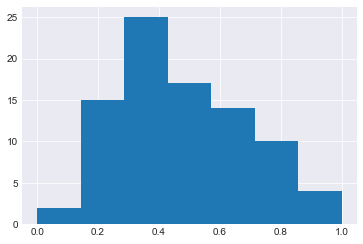

2
Axes(0.125,0.125;0.775x0.755)


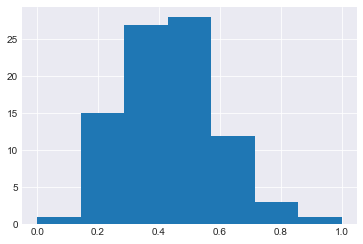

3
Axes(0.125,0.125;0.775x0.755)


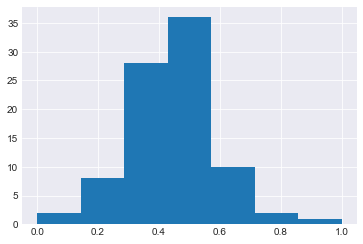

4
Axes(0.125,0.125;0.775x0.755)


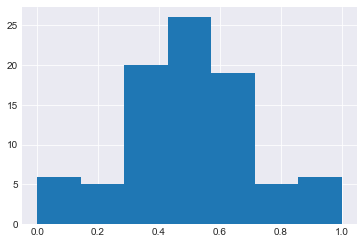

5
Axes(0.125,0.125;0.775x0.755)


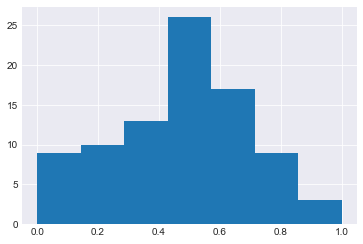

6
Axes(0.125,0.125;0.775x0.755)


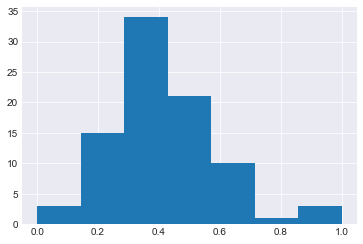

7
Axes(0.125,0.125;0.775x0.755)


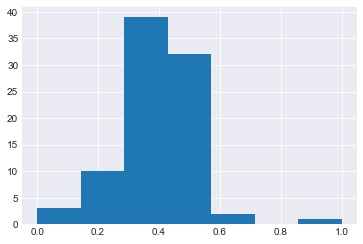

In [5]:
from sklearn.decomposition import FactorAnalysis, PCA

n_comp = 7

fa = PCA(n_components=n_comp).fit(data)
factors = fa.transform(data)

# Scale values
mms = MinMaxScaler().fit(factors)
factors = mms.transform(factors)

factors = pd.DataFrame(factors, columns=[str(n) for n in np.arange(1,n_comp+1,1)])

# Let's look at the histograms as well...
for i in factors.columns:
    print(i)
    print(factors[i].hist(bins=7))
    plt.show()

Those are some nice-looking distributions!

Now let's examine which items correlate with each factor.

In [6]:
def show_items(factor):
    '''Returns a dataframe of correlations, sorted
    by absolute value'''
    f = pd.DataFrame(data.corrwith(factors[str(factor)]))
    f['absol'] = abs(f[0])
    return f.sort_values('absol', ascending=False).drop('absol', axis=1).head()

# This is like a mixture of extraversion and assertiveness
show_items(1)

,0
itakecharge,0.677
icomeupwithboldplans,0.644
iexpressmyselfeasily,0.631
iturnplansintoactions,0.624
iwaitforotherstoleadtheway,-0.620


In [7]:
# Neuroticism and sensitivity to stress
show_items(2)

,0
iworryaboutthings,0.774
igetoverwhelmedbyemotions,0.692
iameasilyhurt,0.652
iexperiencemyemotionsintensely,0.611
igetstressedouteasily,0.605


In [8]:
# (Dis)agreeableness
show_items(3)

,0
imakedemandsonothers,0.594
iinsultpeople,0.567
iseekconflict,0.553
ibelievethatiambetterthanothers,0.552
ithinktoohighlyofmyself,0.549


In [9]:
# I'd call this one extraversion "proper"
show_items(4)

,0
iprefertobealone,-0.570
idontmindeatingalone,-0.513
ishowmyfeelings,0.512
iamopenaboutmyfeelings,0.507
iseekquiet,-0.506


In [10]:
# Openness to experience
show_items(5)

,0
iexperienceveryfewemotionalhighsandlows,0.554
iseldomnoticetheemotionalaspectsofpaintingsandpictures,0.522
iseldomdaydream,0.510
idonotlikeart,0.501
iseldomgetemotional,0.498


In [11]:
# I guess I'd call this... inattentiveness?
# (This makes me think we still need more data -- these shouldn't correlate together so much)
show_items(6)

,0
ifrequentlyforgettodothings,0.486
ispendtimereflectingonthings,0.454
itrytounderstandmyself,0.447
iletmyattentionwanderoff,0.440
iremaincalmunderpressure,0.438


In [12]:
# (Un-)Conscientiousness, or something vaguely like it.
show_items(7)

,0
iwanttobetoldiamright,-0.455
iamnotbotheredbydisorder,0.427
iamquicktojudgeothers,-0.402
iamfilledwithdoubtsaboutthings,-0.391
ireveallittleaboutmyself,0.383
